In [2]:
import pandas as pd

## Énoncé
En tant que data analyst de l'entreprise ESIEEConnex, votre rôle est d'aider les salariés/freelances à trouver le lieu idéal pour travailler à distance. C'est votre deuxième mois chez ESIEEConnex, après avoir suivi un onboarding qui vous a fait découvrir le fonctionnement interne, on vous assigne maintenant votre première mission !

## Mission
À la suite d'une enquête de satisfaction dans le but d'améliorer nos services, certains utilisateurs ont fait remonter le besoin d'une connection mobile fiable. C'est nécessaire pour accéder à des documents en déplacement ou même lorsque la connexion Wifi principale tombe. On vous demande donc à partir de données disponibles en open data, d'établir un classement des communes et départements disposant des meilleures couvertures mobiles pour plusieurs opérateurs français. En effet, on doit aussi prendre en compte l'opérateur mobile de nos utilisateurs, car ils ne sont pas tous disposés à en changer.

Pour cette mission, vous aurez à disposition 2 fichiers :
- la taille de la population par commune ([source](https://www.insee.fr/fr/statistiques/4265429?sommaire=4265511))
- des informations sur la connectivité mobile par commune ([source](https://www.data.gouv.fr/fr/datasets/mon-reseau-mobile/))

# Exercice
## Partie 1 - Répartition de la population
### 1 - Chargement des données
 Téléchargez l'[archive suivante](https://www.insee.fr/fr/statistiques/fichier/4265429/ensemble.zip) puis chargez le fichier `Communes.csv` à l'aide de Pandas. Stockez le résultat du chargement dans la variable `df_pop`.

Les colonnes du fichier sont uniquement séparées par des points-virgules.

**Petit coup de pouce pour démarrer**, pour chacune des conditions suivantes, trouvez le paramètre de la fonction `read_csv` adapté :
- les colonnes sont séparées par des points-virgules
- l'encodage à utiliser est *UTF-8*

Pouvez-vous afficher les 5 premières lignes du dataframe pour vérifier que les données sont bien chargées ?

,DEPCOM,COM,PMUN,PCAP,PTOT
0,01001,L' Abergement-Clémenciat,776,18,794
1,01002,L' Abergement-de-Varey,248,1,249
2,01004,Ambérieu-en-Bugey,14035,393,14428
3,01005,Ambérieux-en-Dombes,1689,34,1723
4,01006,Ambléon,111,6,117


À l'aide de la fonction `loc`, sélectionnez uniquement les colonnes `DEPCOM`, `COM` et `PTOT`.

,DEPCOM,COM,PTOT
0,01001,L' Abergement-Clémenciat,794
1,01002,L' Abergement-de-Varey,249
2,01004,Ambérieu-en-Bugey,14428
3,01005,Ambérieux-en-Dombes,1723
4,01006,Ambléon,117
...,...,...,...
34990,97419,Sainte-Rose,6497
34991,97420,Sainte-Suzanne,23704
34992,97421,Salazie,7387
34993,97422,Le Tampon,79705


### Description des colonnes
**DEPCOM** : numéro de commune

**COM** : nom de la commune

**PMUN** : la population municipale comprend les personnes ayant leur résidence habituelle sur le territoire de la commune, dans un logement ou une communauté, les personnes détenues dans les établissements pénitentiaires de la commune, les personnes sans abri recensées sur le territoire de la commune et les personnes résidant habituellement dans une habitation mobile recensées sur le territoire de la commune.

**PCAP** : La population comptée à part comprend certaines personnes dont la résidence habituelle est dans une autre commune mais qui ont conservé une résidence sur le territoire de la commune.

**PTOT** : la population totale est la somme de la population municipale et de la population comptée à part.

### 2 - Le dataframe

 Quel est le type de la variable `df_pop` ?

pandas.core.frame.DataFrame

Combien de lignes et colonnes sont contenues dans `df_pop` ?

(34995, 5)

Affichez le type des colonnes

In [8]:
df_pop.dtypes

DEPCOM    object
COM       object
PMUN       int64
PCAP       int64
PTOT       int64
dtype: object

### 3 - Qualité des données

Un jeu de données contient parfois des [valeurs manquantes](https://fr.wikipedia.org/wiki/Donn%C3%A9es_manquantes), ce sont des valeurs qui ne sont pas renseignées, cela pour plusieurs raisons :
- volontairement (ex: la valeur n'existe pas)
- involontairement (ex: la valeur n'est pas lisible)
- etc

Existe-t-il des valeurs manquantes dans ce jeu de données ?

DEPCOM    0
COM       0
PMUN      0
PCAP      0
PTOT      0
dtype: int64

Existe-t-il des duplicatas ?

0

### 4 - Analyse des données

Quel est le top 15 des communes les plus peuplées ?

,DEPCOM,COM,PMUN,PCAP,PTOT
11831,31555,Toulouse,479553,5256,484809
1958,06088,Nice,340017,2962,342979
16332,44109,Nantes,309346,5157,314503
13035,34172,Montpellier,285121,3479,288600
26571,67482,Strasbourg,280966,2779,283745
12386,33063,Bordeaux,254436,3368,257804
29311,75115,Paris 15e Arrondissement,233392,1786,235178
22165,59350,Lille,232787,2055,234842
13425,35238,Rennes,216815,4110,220925
29316,75120,Paris 20e Arrondissement,195814,925,196739


Affichez les statistiques élémentaires (min, max, moyenne). Quel est la taille de la plus petite population ?

count     34995.000000
mean       1936.307815
std        8696.358429
min           0.000000
25%         203.000000
50%         468.000000
75%        1184.000000
max      484809.000000
Name: PTOT, dtype: float64

Pensez-vous que la distribution des données est très homogène autour de la valeur médiane, ou au contraire très variable ? Pour répondre à cette question vous pouvez faire un diagramme en boîte.

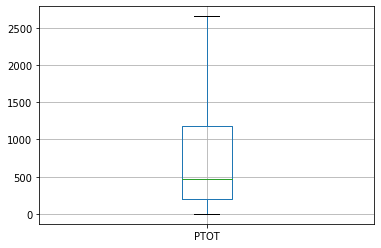

Quelles sont les communes n'ayant aucun habitant ?

,DEPCOM,COM,PMUN,PCAP,PTOT
20074,55039,Beaumont-en-Verdunois,0,0,0
20085,55050,Bezonvaux,0,0,0
20161,55139,Cumières-le-Mort-Homme,0,0,0
20205,55189,Fleury-devant-Douaumont,0,0,0
20243,55239,Haumont-près-Samogneux,0,0,0
20301,55307,Louvemont-Côte-du-Poivre,0,0,0


Toutes les communes n'ayant aucun habitant sont dans le département 55 !

Quel est le total de la population ?

67761092

Pour simplifier le travail, on exploitera uniquement `PTOT` comme indicateur de la taille de la population. Supprimez donc `PMUN` et `PCAP`.

Renommez la colonne `PTOT` en `population`, `DEPCOM` en `code_dep`, `COM` en `nom_dep`.

Nous allons utiliser ce fichier de données dans la suite du projet, seulement un problème persiste, les villes avec des arrondissements doivent être fusionnées, pour ne plus prendre en considération ces derniers. Première étape, lister les communes dont le nom termine par `Arrondissement`. ([aide](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.endswith.html))

,code_dep,nom_dep,population
4349,13201,Marseille 1er Arrondissement,39967
4350,13202,Marseille 2e Arrondissement,24873
4351,13203,Marseille 3e Arrondissement,48990
4352,13204,Marseille 4e Arrondissement,48791
4353,13205,Marseille 5e Arrondissement,46499


Calculez la population totale de Marseille, de même pour Lyon et Paris.

2204773

869815

522679

Supprimez les communes dont le nom termine par `Arrondissement`.

Ajouter les communes fusionnées dans le dataframe (3 lignes). ([aide](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html))

Réinitialiser les index du dataframe.

,code_dep,nom_dep,population
0,01001,L' Abergement-Clémenciat,794
1,01002,L' Abergement-de-Varey,249
2,01004,Ambérieu-en-Bugey,14428
3,01005,Ambérieux-en-Dombes,1723
4,01006,Ambléon,117
...,...,...,...
34948,97422,Le Tampon,79705
34949,97423,Les Trois-Bassins,7234
34950,75056,Paris,2204773
34951,69123,Lyon,522679


-----------

## Partie 2 - Qualité de la couverture du réseau mobile
### 1 - Chargement des données

Téléchargez et importez le fichier à [l'URL suivante](https://www.data.gouv.fr/fr/datasets/r/77ca5457-c1fe-4450-9761-1a6a598921c0), stockez le résultat du chargement dans la variable `df_reseau`.

**Petit coup de pouce pour démarrer**, pour chacune des conditions suivantes, trouvez le paramètre de la fonction `read_csv` adapté :
- les colonnes sont séparées par des points-virgules
- l'encodage a utiliser est *iso-8859-1*

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Familliarisez vous avec les données, le détails des colonnes est disponible [ici](https://www.data.gouv.fr/fr/datasets/mon-reseau-mobile/#resource-77ca5457-c1fe-4450-9761-1a6a598921c0).

### 2 - Qualité des données

Calculer le nombre de valeurs manquantes par colonne.

code_op          0
nom_op           0
num_site         0
x_lambert_93     0
y_lambert_93     0
nom_reg          0
nom_dep          0
insee_dep        0
nom_com         11
insee_com        0
site_2g          0
site_3g          0
site_4g          0
mes_4g_trim      0
site_ZB          0
site_DCC         0
dtype: int64

Existe-t-il des duplicatas ? si oui, supprimez les.

Supprimez les variables suivantes ['num_site', 'code_op', 'x_lambert_93', 'y_lambert_93', 'site_ZB', 'site_DCC'].

,nom_op,nom_reg,nom_dep,insee_dep,nom_com,insee_com,site_2g,site_3g,site_4g
0,Orange,AUVERGNE RHONE ALPES,AIN,01,BOURG EN BRESSE,01053,1,1,1
1,Orange,AUVERGNE RHONE ALPES,AIN,01,DAGNEUX,01142,1,1,1
2,Orange,AUVERGNE RHONE ALPES,AIN,01,TRAMOYES,01424,1,1,1
3,Orange,AUVERGNE RHONE ALPES,AIN,01,NANTUA,01269,1,1,1
4,Orange,AUVERGNE RHONE ALPES,AIN,01,NEYROLLES,01274,1,1,1


Quels sont les départements listés dans ce fichier ? 

array(['ain', 'aisne', 'allier', 'alpes de haute provence',
       'hautes alpes', 'alpes maritimes', 'ardeche', 'ardennes', 'ariege',
       'aube', 'haute marne', 'aude', 'aveyron', 'bouches du rhone',
       'calvados', 'cantal', 'charente', 'charente maritime', 'cher',
       'correze', "cote d'or", "cotes d'armor", 'creuse', 'indre',
       'dordogne', 'doubs', 'drome', 'eure', 'seine maritime',
       'eure et loir', 'finistere', 'corse du sud', 'haute corse', 'gard',
       'haute garonne', 'gers', 'gironde', 'herault', 'ille et vilaine',
       'indre et loire', 'isere', 'jura', 'landes', 'loir et cher',
       'loire', 'rhone', 'haute loire', 'loire atlantique', 'morbihan',
       'loiret', 'lot', 'lot et garonne', 'lozere', 'maine et loire',
       'manche', 'marne', 'mayenne', 'meurthe et moselle', 'moselle',
       'meuse', 'nievre', 'nord', 'oise', 'orne', 'pas de calais',
       'puy de dome', 'pyrenees atlantiques', 'hautes pyrenees',
       'pyrenees orientales', 'bas r

Mettez tous les nom des regions et des département en miniscule, et remplacer le '-' par un espace.

,nom_op,nom_reg,nom_dep,insee_dep,nom_com,insee_com,site_2g,site_3g,site_4g
0,Orange,auvergne rhone alpes,ain,01,BOURG EN BRESSE,01053,1,1,1
1,Orange,auvergne rhone alpes,ain,01,DAGNEUX,01142,1,1,1
2,Orange,auvergne rhone alpes,ain,01,TRAMOYES,01424,1,1,1
3,Orange,auvergne rhone alpes,ain,01,NANTUA,01269,1,1,1
4,Orange,auvergne rhone alpes,ain,01,NEYROLLES,01274,1,1,1
...,...,...,...,...,...,...,...,...,...
86439,Bouygues Telecom,provence alpes cote d'azur,vaucluse,84,GRAMBOIS,84052,0,1,0
86440,Bouygues Telecom,grand est,vosges,88,MARTIGNY-LES-GERBONVAUX,88290,0,1,0
86441,Bouygues Telecom,grand est,vosges,88,GRIGNONCOURT,88220,0,1,1
86442,Bouygues Telecom,grand est,vosges,88,PROVENCHERES-LES-DARNEY,88360,0,1,1


### 3 - Analyse des données

Quels sont les opérateurs français référencés dans ce fichier ?

array(['Orange', 'SFR', 'Free Mobile', 'Bouygues Telecom'], dtype=object)

Affichez le nombre de sites pour chacun des opérateurs.

Orange              25141
SFR                 22267
Bouygues Telecom    21005
Free Mobile         17918
Name: nom_op, dtype: int64

Affichez le nombre d'antennes en fonction des opérateurs et des technologies (indice : tableau pivot).

,site_2g,site_3g,site_4g
nom_op,,,
Bouygues Telecom,19988,20823,19158
Free Mobile,0,17918,16605
Orange,19766,24770,22620
SFR,20621,22093,19758
All,60375,85604,78141


Quelles sont les 15 communes disposant du plus d'antennes, tous types confondus ? utilisez le code commune comme indicateur de regroupement (indice groupby).

In [42]:
top15_com

insee_com
75056    1735
31555    1114
06088     864
13055     624
34172     595
67482     546
44109     528
59350     522
69123     516
33063     495
35238     434
13001     420
30189     395
42218     358
31555     343
dtype: int64

Avec ce top 15 des codes communes, retrouvez la taille de population associée (utilisez le fichier population). Une autre façon d'expliquer : affichez la taille de population des communes dont le numéro est contenu dans le top 15. (indice isin)

,code_dep,nom_dep,population
1958,06088,Nice,342979
4293,13001,Aix-en-Provence,145676
11098,30189,Nîmes,152952
11815,31555,Toulouse,484809
12370,33063,Bordeaux,257804
13019,34172,Montpellier,288600
13409,35238,Rennes,220925
15840,42218,Saint-Étienne,174520
16316,44109,Nantes,314503
22149,59350,Lille,234842


Faites une jointure des tables réseau et population pour récupérer la population totale associée à chacune des communes.

In [45]:
df_pop_reseau

,nom_op,nom_reg,nom_dep,insee_dep,nom_com,insee_com,site_2g,site_3g,site_4g,code_dep,population
0,Orange,auvergne rhone alpes,ain,01,BOURG EN BRESSE,01053,1,1,1,01053,43306.0
1,Orange,auvergne rhone alpes,ain,01,DAGNEUX,01142,1,1,1,01142,4772.0
2,Orange,auvergne rhone alpes,ain,01,TRAMOYES,01424,1,1,1,01424,1724.0
3,Orange,auvergne rhone alpes,ain,01,NANTUA,01269,1,1,1,01269,3584.0
4,Orange,auvergne rhone alpes,ain,01,NEYROLLES,01274,1,1,1,01274,654.0
...,...,...,...,...,...,...,...,...,...,...,...
86326,Bouygues Telecom,provence alpes cote d'azur,vaucluse,84,GRAMBOIS,84052,0,1,0,NaN,NaN
86327,Bouygues Telecom,grand est,vosges,88,MARTIGNY-LES-GERBONVAUX,88290,0,1,0,NaN,NaN
86328,Bouygues Telecom,grand est,vosges,88,GRIGNONCOURT,88220,0,1,1,NaN,NaN
86329,Bouygues Telecom,grand est,vosges,88,PROVENCHERES-LES-DARNEY,88360,0,1,1,NaN,NaN


Un utilisateur nous demande de lui trouver une **commune dans le rhone**, dont la population est inférieure à **1 000 habitants** et disposant d'une bonne couverture réseau pour l'opérateur **Orange**, à vous de jouer.

,nom_op,nom_reg,nom_dep,insee_dep,nom_com,insee_com,site_2g,site_3g,site_4g,code_dep,population
17766,Orange,auvergne rhone alpes,rhone,69,SAINT VINCENT DE REINS,69240,1,1,1,69240,636.0
17753,Orange,auvergne rhone alpes,rhone,69,SAINT ROMAIN EN GIER,69236,1,1,1,69236,584.0
17561,Orange,auvergne rhone alpes,rhone,69,SAUVAGES,69174,1,1,1,69174,625.0
17571,Orange,auvergne rhone alpes,rhone,69,GREZIEU LE MARCHE,69095,1,1,1,69095,832.0
17584,Orange,auvergne rhone alpes,rhone,69,TREVES,69252,1,1,1,69252,746.0
17585,Orange,auvergne rhone alpes,rhone,69,SALLES ARBUISSONNAS EN BEAUJOLAIS,69172,1,1,1,69172,819.0
17588,Orange,auvergne rhone alpes,rhone,69,ARDILLATS,69012,1,1,1,69012,637.0
17650,Orange,auvergne rhone alpes,rhone,69,CHAMELET,69039,1,1,1,69039,692.0
17652,Orange,auvergne rhone alpes,rhone,69,SAINT NIZIER D AZERGUES,69229,1,1,1,69229,804.0
17657,Orange,auvergne rhone alpes,rhone,69,CLAVEISOLLES,69060,1,1,1,69060,730.0


Pouvez-vous faire une fonction pour automatiser cette recherche ?

En utilisant la fonction précédente, ré-implémentez la recherche précédente.

,nom_op,nom_reg,nom_dep,insee_dep,nom_com,insee_com,site_2g,site_3g,site_4g,code_dep,population
17766,Orange,auvergne rhone alpes,rhone,69,SAINT VINCENT DE REINS,69240,1,1,1,69240,636.0
17753,Orange,auvergne rhone alpes,rhone,69,SAINT ROMAIN EN GIER,69236,1,1,1,69236,584.0
17561,Orange,auvergne rhone alpes,rhone,69,SAUVAGES,69174,1,1,1,69174,625.0
17571,Orange,auvergne rhone alpes,rhone,69,GREZIEU LE MARCHE,69095,1,1,1,69095,832.0
17584,Orange,auvergne rhone alpes,rhone,69,TREVES,69252,1,1,1,69252,746.0
17585,Orange,auvergne rhone alpes,rhone,69,SALLES ARBUISSONNAS EN BEAUJOLAIS,69172,1,1,1,69172,819.0
17588,Orange,auvergne rhone alpes,rhone,69,ARDILLATS,69012,1,1,1,69012,637.0
17650,Orange,auvergne rhone alpes,rhone,69,CHAMELET,69039,1,1,1,69039,692.0
17652,Orange,auvergne rhone alpes,rhone,69,SAINT NIZIER D AZERGUES,69229,1,1,1,69229,804.0
17657,Orange,auvergne rhone alpes,rhone,69,CLAVEISOLLES,69060,1,1,1,69060,730.0


### Conclusion

On estime ici la qualité de la couverture réseau en comptant le nombre d'antennes dans chaque commune, c'est une approche simpliste, en réalité les signaux vont  transiter entre les communes. Pour améliorer notre approche, il serait plus adapté de construire une carte de la densité du nombre d'antennes au Km². **Toutefois c'est un bon début, il faut toujours commencer par une solution simple, l'évaluer, puis itérer vers une amélioration, plutôt que de réfléchir éternellement à la mise en place d'une solution parfaite.**

*Premature optimisation is the root of all evil. Donald Knuth*

### Pour aller plus loin

Il est évident que ESIEEConnex doit exploiter d'autres indicateurs afin d'affiner la sélection de communes candidates, par exemple l'accès à la fibre optique, la présence d'une ou plusieurs salles de sport, des restaurants, etc. Pour aller plus loin, utilisez le [fichier suivant](https://www.data.gouv.fr/fr/datasets/data-insee-sur-les-communes/) qui regroupe divers indicateurs par commune. À terme, certaines informations ne seront plus accessibles en open data, il faudra alors faire appel à des API payantes ou du web scraping pour collecter directement à la source.

# Travail à faire: Concevez et Développez une solution plus raffinée à cette problématique 